In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

# Introduction

 ### The MLB Draft takes place every year and is the event where amateur players are drafted by the organizations of Major League Baseball. These players have high hopes of making the Major Leagues and turning their baseball career into ones that are remembered for years to come. The organizations also have expectations for these players, hoping that they can bring their franchise value in many ways: winning, recognition, and revenue.

### The MLB Draft is different from other sports in that it is the longest draft of any league, with the most selections. In these many selections, both high school and college players are eligible to be drafted, making the player pool much larger than other sports. This also makes the decision to sign with these MLB franchises more of an actual decision, especially for high school players. Do they want to bypass some of the most formative years of any person's life, in hopes of reaching their professional careers quicker? Or would they rather go to college in hopes of developing and getting drafted after three additional years. This decision also makes the monetary decisions in the MLB Draft different with large bonuses being handed out to players in hopes that they sign, as these players do not make much money while they grind their way through the minor leagues. These different factors lead to an interesting analysis of draft data, with many insights that can be drawn over time.

# Research Questions
### - What are the overall trends for the players drafted throughout time?
### - Which areas of the country are most prevalent as it comes to having players drafted?
### - Which groups of players are more likely to sign than others?
### - How has the bonus changed over time and what factors play into a player getting a higher bonus?

# Data Inspection and Cleaning

In [2]:
draft = pd.read_csv('2022_mlb_draft.csv') # Read in the dataset

In [3]:
draft.head() #Display first five rows of the data

,DraftYear,DraftRound,OvPck,Tm,Signed,Bonus,Name,Pos,Type,Drafted Out of
0,1965,1,1,Athletics,Y,"$100,000",Rick Monday,OF,4Yr,"Arizona State University (Tempe, AZ)"
1,1965,1,2,Mets,Y,"$50,000",Les Rohr,LHP,HS,"Billings West HS (Billings, MT)"
2,1965,1,3,Senators,Y,"$65,000",Joe Coleman,RHP,HS,"Natick HS (Natick, MA)"
3,1965,1,4,Astros,Y,"$40,000",Alex Barrett,SS,HS,"Atwater HS (Atwater, CA)"
4,1965,1,5,Red Sox,Y,"$62,500",Billy Conigliaro,OF,HS,"Swampscott HS (Swampscott, MA)"


In [4]:
draft.info() # Get basic info about the DataFrame and features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64632 entries, 0 to 64631
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DraftYear       64632 non-null  int64 
 1   DraftRound      64632 non-null  int64 
 2   OvPck           64632 non-null  int64 
 3   Tm              64631 non-null  object
 4   Signed          64578 non-null  object
 5   Bonus           10410 non-null  object
 6   Name            64632 non-null  object
 7   Pos             64625 non-null  object
 8   Type            64086 non-null  object
 9   Drafted Out of  64086 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.9+ MB


The datatypes look as they should for the given features except for the 'Bonus' feature. This should be switched to numeric to simplify calculation and give the ability to track how the signing bonus for the players changes.

In [5]:
draft.describe() #Get basic statistics about the numeric columns

,DraftYear,DraftRound,OvPck
count,64632.000000,64632.000000,64632.000000
mean,1995.685713,21.883432,605.429524
std,15.306217,13.474716,387.059976
min,1965.000000,1.000000,1.000000
25%,1984.000000,10.000000,281.000000
50%,1997.000000,21.000000,565.000000
75%,2008.000000,32.000000,887.000000
max,2022.000000,50.000000,1530.000000


In [6]:
draft.shape #Rows and columns of dataframe

(64632, 10)

To start off it looks like we have 10 features for 64,632 draft picks, spanning all the way back to 1965.

Lets take a look at the NA values of our dataset:

In [7]:
print(draft.isnull().sum()) # Check how many values have null entries in certain columns

print('NA Values as percents')

(draft.isnull().sum() / len(draft)) * 100 # Check the amount of nulls as a percent of total entries

DraftYear             0
DraftRound            0
OvPck                 0
Tm                    1
Signed               54
Bonus             54222
Name                  0
Pos                   7
Type                546
Drafted Out of      546
dtype: int64
NA Values as percents


DraftYear          0.000000
DraftRound         0.000000
OvPck              0.000000
Tm                 0.001547
Signed             0.083550
Bonus             83.893427
Name               0.000000
Pos                0.010831
Type               0.844783
Drafted Out of     0.844783
dtype: float64

Because there are only seven players missing their position assignment and only one is missing the team who drafted them, we can manually look up these players and input their team and position here:

In [8]:

draft.loc[58310, 'Pos'] = 'RHP'
draft.loc[10589, 'Pos'] = 'OF'
draft.loc[30389, 'Pos'] = 'RHP'
draft.loc[30507, 'Pos'] = 'LHP'
draft.loc[54889, 'Pos'] = 'RHP'
draft.loc[55814, 'Pos'] = 'RHP'
draft.loc[58149, 'Pos'] = 'RHP'

draft.loc[49024, 'Tm'] = 'Mets'


Because it is essential that we know what Team the player was picked by, whether or not they signed, their position, and what type on institution they were drafted out of in order to see trends in the MLB draft throughout the years, I have decided to drop all the rows containing NA Values in these categories as they make up a very small proportion of the data and are most likely from decades ago where this information was not always readily available or tracked.

In [9]:
draft.dropna(subset = ['Signed','Drafted Out of', 'Type'], inplace = True)

print(draft.isnull().sum())

print('NA Values as percents')

print(draft.isnull().sum() / len(draft) * 100)


DraftYear             0
DraftRound            0
OvPck                 0
Tm                    0
Signed                0
Bonus             53663
Name                  0
Pos                   0
Type                  0
Drafted Out of        0
dtype: int64
NA Values as percents
DraftYear          0.000000
DraftRound         0.000000
OvPck              0.000000
Tm                 0.000000
Signed             0.000000
Bonus             83.806534
Name               0.000000
Pos                0.000000
Type               0.000000
Drafted Out of     0.000000
dtype: float64


We will now take a closer look at the Team column to see if any of the names need to be cleaned up.

In [10]:
draft['Tm'].unique()[:50]

array(['Athletics', 'Mets', 'Senators', 'Astros', 'Red Sox', 'Cubs',
       'Indians', 'Dodgers', 'Twins', 'Pirates', 'Angels', 'Braves',
       'Tigers', 'Giants', 'Orioles', 'Reds', 'White Sox', 'Phillies',
       'Yankees', 'Cardinals', 'Nationals', 'Brewers', 'Padres', 'Royals',
       'Pilots', 'Expos', 'Bend (minors)', 'Rangers', 'Blue Jays',
       'Mariners', 'Yankees via White Sox', 'Athletics via Rangers',
       'Pirates via Dodgers', 'Yankees via Red Sox', 'Orioles via Mets',
       'White Sox via Padres', 'Mariners via Brewers',
       'Orioles via Expos', 'Padres via Angels', 'Orioles via Red Sox',
       'White Sox via Red Sox', 'Giants via Angels',
       'Dodgers via Pirates', 'White Sox via Orioles',
       'Reds via Phillies', 'Tigers via Brewers', 'Padres via Dodgers',
       'Dodgers via Yankees', 'Athletics via Red Sox', 'Reds via Braves'],
      dtype=object)

Here we can clearly see that the Team column is including whether or not the pick was traded for. For the purpose of this analysis, it is more important to include what team ended up with the pick rather than the team that specifically drafted them.

To address this we will create a function that extracts the team name before 'via' for the cases in which a team traded for a pick.

In [11]:
def extract_team_name(team_name):
    if 'via' in team_name:
        return team_name.split('via')[0].strip()
    else: 
        return team_name

In [12]:
draft['Tm'] = draft['Tm'].apply(extract_team_name)
draft['Tm'].unique()

array(['Athletics', 'Mets', 'Senators', 'Astros', 'Red Sox', 'Cubs',
       'Indians', 'Dodgers', 'Twins', 'Pirates', 'Angels', 'Braves',
       'Tigers', 'Giants', 'Orioles', 'Reds', 'White Sox', 'Phillies',
       'Yankees', 'Cardinals', 'Nationals', 'Brewers', 'Padres', 'Royals',
       'Pilots', 'Expos', 'Bend (minors)', 'Rangers', 'Blue Jays',
       'Mariners', 'Boise (minors)', 'Miami Miracle', 'ERI', 'Rockies',
       'Marlins', 'Rays', "D'backs", 'Diamondbacks', 'Devil Rays',
       'Guardians'], dtype=object)

We are now left with former team names of franchises such as 'Expos' or 'Pilots'. We are also left with some Minor league and independent league teams that had picks in the MLB draft decades ago.

We will start by dropping the team names that have '(minors)' and we will also drop those independent league teams that I discussed earlier.

In [13]:
def exclude_minors(team_name): # Drop team names that include (minors) or are an independent league team
    if '(minors)' in team_name:
        return None
    elif team_name == 'ERI':
        return None
    elif team_name == 'Miami Miracle':
        return None
    else:
        return team_name

In [14]:
draft['Tm'] = draft['Tm'].apply(exclude_minors)
draft.dropna(subset = ['Tm'], inplace = True)
draft['Tm'].unique() # Drop the players drafted by minor league teams or independent league teams

array(['Athletics', 'Mets', 'Senators', 'Astros', 'Red Sox', 'Cubs',
       'Indians', 'Dodgers', 'Twins', 'Pirates', 'Angels', 'Braves',
       'Tigers', 'Giants', 'Orioles', 'Reds', 'White Sox', 'Phillies',
       'Yankees', 'Cardinals', 'Nationals', 'Brewers', 'Padres', 'Royals',
       'Pilots', 'Expos', 'Rangers', 'Blue Jays', 'Mariners', 'Rockies',
       'Marlins', 'Rays', "D'backs", 'Diamondbacks', 'Devil Rays',
       'Guardians'], dtype=object)

Good! Now all that is left to do is map a franchise's former team name to their current team name in order to have only the 30 current MLB teams represented in this dataset.

In [15]:
team_names_dict = {'Senators':'Twins',
                   'Pilots':'Brewers',
                   'Expos':'Nationals',
                   'Devil Rays':'Rays',
                   'Indians':'Guardians',
                   "D'backs" : 'Diamondbacks'}

draft['Tm'] = draft['Tm'].replace(team_names_dict)
draft['Tm'].nunique()

30

The 30 current MLB teams are now the only teams represented in the dataset

We will now clean the 'Bonus' feature

Because this feature is currently a string, we need to remove both the dollar sign and comma in order to convert it into a numeric variable.

We do so using the following function:

In [16]:
def clean_bonus(bonus): #Clean the bonus column and convert to numeric
    if isinstance (bonus, str):
        bonus_clean = bonus.replace('$','').replace(',','')
        return pd.to_numeric(bonus_clean)
    else:
        return None
draft['Bonus'] = draft['Bonus'].apply(clean_bonus)
draft.head()

,DraftYear,DraftRound,OvPck,Tm,Signed,Bonus,Name,Pos,Type,Drafted Out of
0,1965,1,1,Athletics,Y,100000.0,Rick Monday,OF,4Yr,"Arizona State University (Tempe, AZ)"
1,1965,1,2,Mets,Y,50000.0,Les Rohr,LHP,HS,"Billings West HS (Billings, MT)"
2,1965,1,3,Twins,Y,65000.0,Joe Coleman,RHP,HS,"Natick HS (Natick, MA)"
3,1965,1,4,Astros,Y,40000.0,Alex Barrett,SS,HS,"Atwater HS (Atwater, CA)"
4,1965,1,5,Red Sox,Y,62500.0,Billy Conigliaro,OF,HS,"Swampscott HS (Swampscott, MA)"


In [17]:
draft['Bonus'].dtype

dtype('float64')

The Bonus feature is now cleaned and converted to a float, so that it can be used in calculations and visualizations effectively.

I would also like to create a column that has the state or region the player is drafted out of. I did so by using this function to search for a regex at the end of the 'Drafted out of' column to find the state, candian region, or country they were drafted out of

I implemented code for Puerto Rico and the U.S. Virgin islands so they could also be classified as they appeared a decent amount throughout the data.

In [18]:
draft['Drafted Out of'] = draft['Drafted Out of'].str.replace('Puerto Rico', 'PR')
draft['Drafted Out of'] = draft['Drafted Out of'].str.replace('U. S. Virgin Islands', 'USVI')

In [19]:
def extract_state_region_name(school): #Searches the "Drafted Out of" column and returns the the state or region they were drafted out of
    pattern = r'\(*, ([A-Z]{1,4})\)'
    match = re.search(pattern, school)
    if match:
        return match.group(1)
    else:
        return 'Other'

In [20]:
draft['state/region'] = draft['Drafted Out of'].apply(extract_state_region_name)

In [21]:
draft['state/region'].unique()
draft = draft.drop(columns = ['Drafted Out of'])
draft.head()

,DraftYear,DraftRound,OvPck,Tm,Signed,Bonus,Name,Pos,Type,state/region
0,1965,1,1,Athletics,Y,100000.0,Rick Monday,OF,4Yr,AZ
1,1965,1,2,Mets,Y,50000.0,Les Rohr,LHP,HS,MT
2,1965,1,3,Twins,Y,65000.0,Joe Coleman,RHP,HS,MA
3,1965,1,4,Astros,Y,40000.0,Alex Barrett,SS,HS,CA
4,1965,1,5,Red Sox,Y,62500.0,Billy Conigliaro,OF,HS,MA


Here is a list of the codes for the non U.S. states:
* PR: Puerto Rico
* USVI: United States Virgin Islands
* ON: Ontario (Canada)
* BC: British Columbia (Canada)
* QC: Quebec (Canada)
* AB: Alberta (Canada)
* MB: Manitoba (Canada)
* NS: Nova Scotia (Canada)
* SK: Saskatchewan (Canada)
* NB: New Brunswick (Canada)
* PE: Prince Edward Island (Canada)

Now looking at the Position column, we can see that not all positions are put in uppercase, we can do this quickly.

In [22]:
draft['Pos'].unique()

array(['OF', 'LHP', 'RHP', 'SS', 'C', '1B', '3B', '2B', 'INF', 'P', '3b',
       'Inf', 'Of', '1b', 'Ss', '2b', 'inf', 'lHP', 'CF', 'LF', 'RF',
       'IF', 'UTL', 'DH', 'c', 'LHp', 'RHp', 'UT', 'TWP'], dtype=object)

In [23]:
draft['Pos'] = draft['Pos'].str.upper() #Convert columns to uppercase
draft['Pos'].unique()

array(['OF', 'LHP', 'RHP', 'SS', 'C', '1B', '3B', '2B', 'INF', 'P', 'CF',
       'LF', 'RF', 'IF', 'UTL', 'DH', 'UT', 'TWP'], dtype=object)

Some positions were also named incorrectly so we will convert these to the correct name. Additionally, we will convert all outfield positions to 'OF' for simplicity sake.

In [24]:
replacement_dict = {'IF':'INF', 'UT':'UTL','CF':'OF', 'RF':'OF','LF':'OF'}

draft['Pos'] = draft['Pos'].replace(replacement_dict)


draft['Pos'].unique()

array(['OF', 'LHP', 'RHP', 'SS', 'C', '1B', '3B', '2B', 'INF', 'P', 'UTL',
       'DH', 'TWP'], dtype=object)

On further inspection of the dataset we can see that there are only Y to signing answers in the drafts past 2019, therefore we will drop these years, as they don't provide additional insight.

In [25]:
draft_post_2020 = draft[draft['DraftYear']>= 2020]
draft_post_2020['Signed'].value_counts()

Signed
Y      1282
Unk      46
Name: count, dtype: int64

In [26]:
draft = draft[draft['DraftYear'] < 2020]
draft.tail()

,DraftYear,DraftRound,OvPck,Tm,Signed,Bonus,Name,Pos,Type,state/region
63239,2019,40,1213,Brewers,N,NaN,Tyler Keysor,P,4Yr,FL
63240,2019,40,1214,Athletics,Y,1000.0,Sam Romero,P,4Yr,AZ
63241,2019,40,1215,Yankees,N,NaN,Alex Garbrick,P,4Yr,KY
63242,2019,40,1216,Astros,N,NaN,Dillon Plew,1B,4Yr,WA
63243,2019,40,1217,Red Sox,N,NaN,Garrett Irvin,P,JC,CA


In [27]:
draft['Pos'].unique()

array(['OF', 'LHP', 'RHP', 'SS', 'C', '1B', '3B', '2B', 'INF', 'P', 'UTL',
       'DH'], dtype=object)

Our data is now clean and we have added an additional feature. We can now create some visualizations to dive deeper into said the trends of the MLB Draft.

# Data Visualization/Analysis

## Distribution of Picks

Here we will create visualizations of the overall picks by sorting by the various columns to see if we can draw any general insights.

In [28]:
cols_to_sort_by = ['Pos', 'Tm', 'state/region', 'Type'] # Columns that we would like to see the distribution of

def plot_pick_distribution(): 
    for col in cols_to_sort_by: #Count the amount of picks after grouping by each column
        pick_amount = draft.groupby(col)['OvPck'].count().reset_index()
        pick_amount.sort_values(by = 'OvPck', ascending = False, inplace = True )


        plt.figure(figsize = (12,6)) #Graph these distributions as a bar chart
        sns.set_style
        sns.barplot(data = pick_amount, x = col, y = 'OvPck')
        plt.xlabel('Count')
        plt.title('Overall Pick Distribution by {}'.format(col))
        plt.xticks(rotation = 90)

        

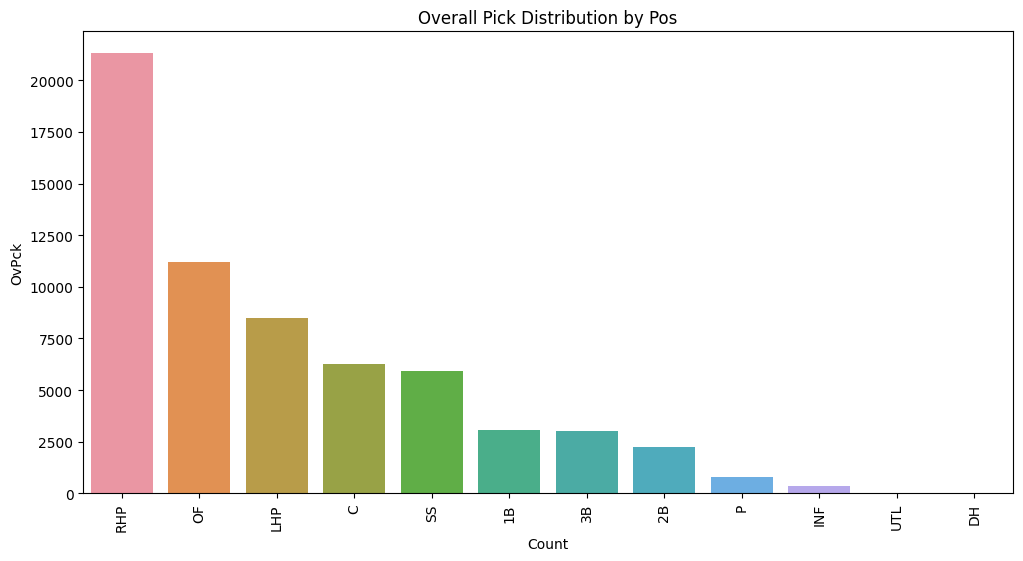

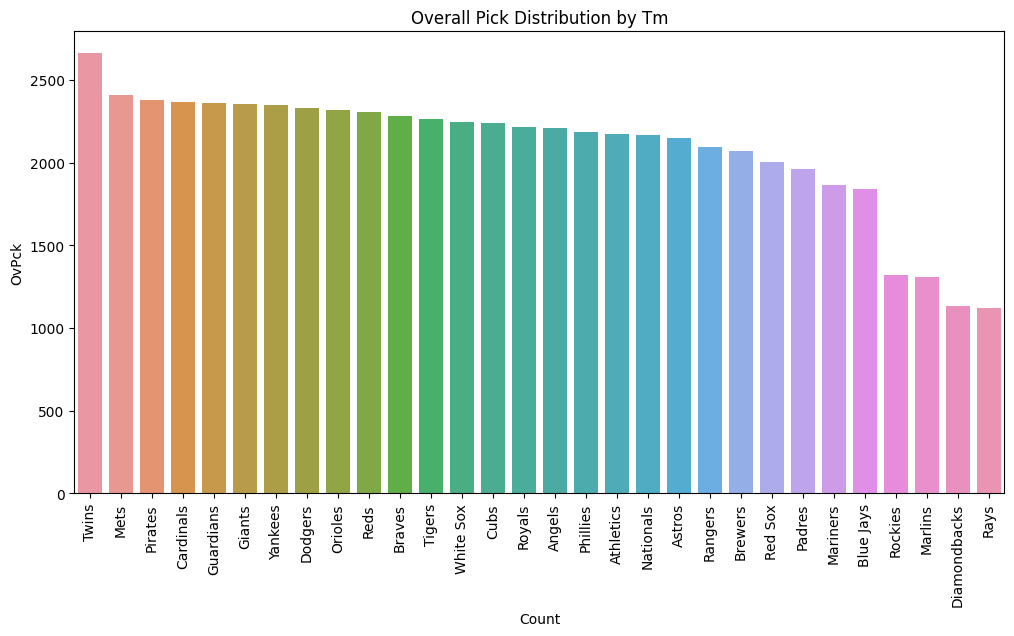

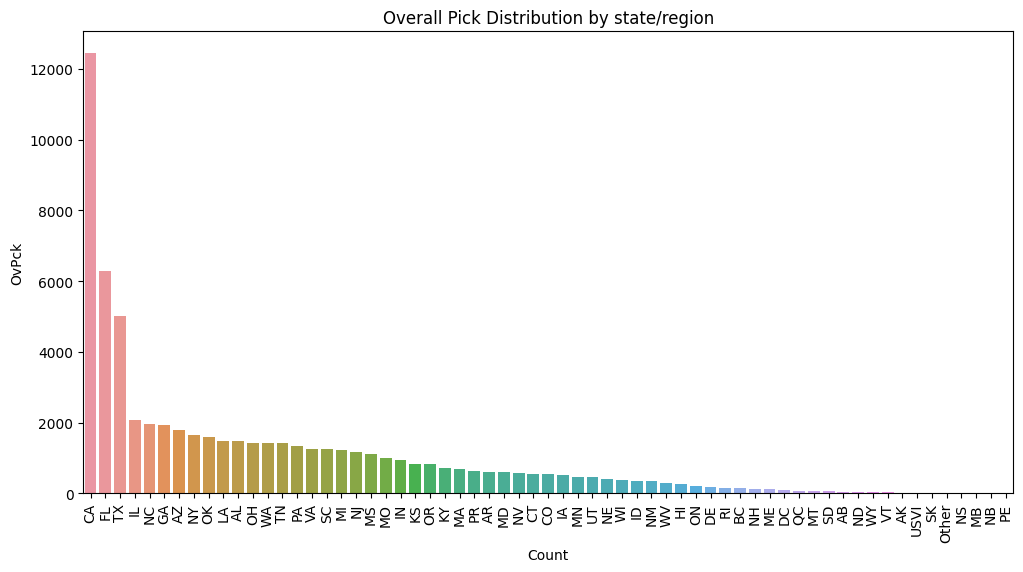

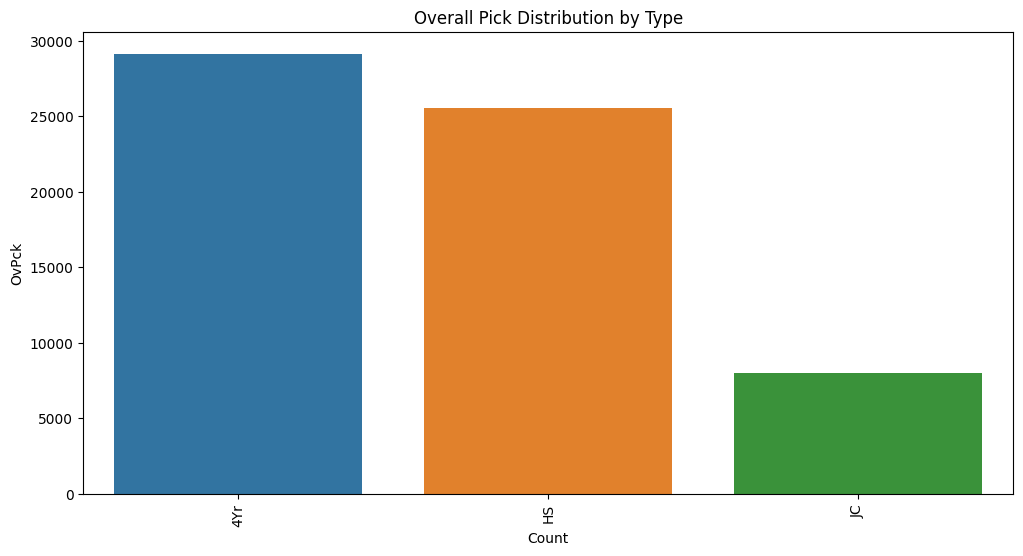

In [29]:
plot_pick_distribution()

Interesting Insights:

Player Positions and Draft Frequency: Our data reveals that Right-Handed Pitchers (RHP) are the most frequently drafted group of players, closely followed by Outfielders (OF) and Left-Handed Pitchers (LHP). This pattern aligns with the structure of Major League Baseball teams, where pitchers constitute a significant portion of the roster, with RHPs being more prevalent than LHPs. Grouping outfielders into a single category further contributes to their high draft frequency, given their representation across three outfield positions.

Franchise Creation and Draft Picks: A compelling observation arises when analyzing the teams with notably fewer draft picks, such as the Rockies, Marlins, Diamondbacks, and Rays. These franchises are among the most recently established teams in MLB. This correlation between a team's draft pick count and its duration as a franchise is logically sound, reflecting the time a team has had to participate in drafts and accumulate selections.

Geographical Distribution and Population: Examining the overall draft pick distribution by state or region demonstrates a strong correlation with the population of each area. This alignment suggests that draft pick numbers tend to mirror the population size of a given region. However, to gain deeper insights into draft efficiency, we should delve into per capita draft pick figures, which account for the population factor.

High School vs. College Players: Another intriguing finding emerges when comparing the draft frequency of High School (HS) players and 4-Year College players. Notably, over the past decade, the frequency of drafting these two groups appears remarkably similar. This trend could indicate a balance between teams' preferences for younger, raw talents from HS and more developed players from college. Further analysis can shed light on the factors influencing this equilibrium.

### Choropleth Map of Picks by State

In [30]:
state_abbreviations = [ 
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA',
    'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
    'VA', 'WA', 'WV', 'WI', 'WY'
] 
# Generates list of state abbrevations used to find picks that are only out of the US.

only_US_draft = draft[draft['state/region'].isin(state_abbreviations)] # Finds players drafted out of US

state_pick_counts = only_US_draft.groupby('state/region')['OvPck'].count().reset_index() # Counts the number of picks per U.S. region
state_pick_counts.rename(columns = {'OvPck':'NumPicks'}, inplace = True) # Renaming OvPck to NumPicks
state_pick_counts.head() 

,state/region,NumPicks
0,AK,21
1,AL,1466
2,AR,601
3,AZ,1798
4,CA,12437


In [31]:
# Choropleth plot of total amount of pick by states
fig = px.choropleth(state_pick_counts,
                    locations='state/region',
                    color='NumPicks',
                    locationmode='USA-states',
                    scope='usa',
                    title='Number of Picks by State',
                    color_continuous_scale='YlGnBu', 
                    labels={'NumPicks': 'Number of Picks'},
                    hover_name='state/region')

fig.update_coloraxes(colorbar_title='Number of Picks', cmin=state_pick_counts['NumPicks'].min(), cmax=state_pick_counts['NumPicks'].max())

fig.update_layout(geo=dict(showcoastlines=True, coastlinecolor='Black', showland=True, landcolor='White'),
                  coloraxis_showscale=True)

fig.show()

As evident from the analysis, a discernible correlation emerges between the number of draft picks and the population of each state. This alignment resonates intuitively, reinforcing the notion that states with larger populations naturally yield a greater number of draft selections. To validate this hypothesis, a choropleth plot depicting the overall state populations can provide a comprehensive visual summary, substantiating the relationship between draft picks and demographic size.

In [32]:
state_population = pd.read_csv('2019_Census_US_Population_Data_By_State_Lat_Long.csv')
state_population.head() # Census population data from 2019 to compare the amount of overall picks up to 2019 to the populations during 2019

,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629


In [33]:
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

state_population['StateAbbrev'] = state_population['STATE'].map(state_abbreviations)
state_population.head() # Create a column for state abbreviations so we can merge together the dataframes

,STATE,POPESTIMATE2019,lat,long,StateAbbrev
0,Alabama,4903185,32.377716,-86.300568,AL
1,Alaska,731545,58.301598,-134.420212,AK
2,Arizona,7278717,33.448143,-112.096962,AZ
3,Arkansas,3017804,34.746613,-92.288986,AR
4,California,39512223,38.576668,-121.493629,CA


In [34]:
# Choropleth plot to show the state populations
fig = px.choropleth(state_population,
                    locations='StateAbbrev',
                    color='POPESTIMATE2019',
                    locationmode='USA-states',
                    scope='usa',
                    title='State Population (2019)',
                    color_continuous_scale='YlGnBu', 
                    labels={'POPESTIMATE2019': 'Population'},
                    hover_name='StateAbbrev')

fig.update_coloraxes(colorbar_title='Population', cmin=state_population['POPESTIMATE2019'].min(), cmax=state_population['POPESTIMATE2019'].max())

fig.update_layout(geo=dict(showcoastlines=True, coastlinecolor='Black', showland=True, landcolor='White'),
                  coloraxis_showscale=True)

fig.show()

The resemblance between these patterns is uncanny. To gain a more insightful perspective on states' efficiency in producing MLB Draft picks, a shift in focus is warranted. Exploring the number of draft picks per 100,000 residents offers a refined lens, allowing us to gauge states' adeptness at nurturing baseball talent within the context of their population density. This recalibration promises to unveil a richer depiction of states' drafting efficacy, shedding light on nuanced aspects of player selection dynamics.

In [35]:
# Merge together the dataframes on the Abbreviation column and create a new column that shows the amount of picks per state by 100000 residents.
population_picks = pd.merge(state_pick_counts, state_population[['StateAbbrev', 'POPESTIMATE2019']], left_on='state/region', right_on='StateAbbrev', how ='left' )
population_picks.drop(columns = 'StateAbbrev', inplace = True)
population_picks['PicksPer100000'] = (population_picks['NumPicks']/population_picks['POPESTIMATE2019']) * 100000
population_picks.head()

,state/region,NumPicks,POPESTIMATE2019,PicksPer100000
0,AK,21,731545,2.870637
1,AL,1466,4903185,29.898933
2,AR,601,3017804,19.915144
3,AZ,1798,7278717,24.702156
4,CA,12437,39512223,31.476336


In [36]:
# Graph new choropleth graphs by picks per 100,000 residents
fig = px.choropleth(population_picks,
                    locations='state/region',
                    color='PicksPer100000',
                    locationmode='USA-states',
                    scope='usa',
                    labels={'PicksPer100000': 'Picks Per 100,000 Residents'},
                    color_continuous_scale='YlGnBu', 
                    hover_name='state/region')

fig.update_coloraxes(colorbar_title='Picks Per 100,000 Residents', cmin=population_picks['PicksPer100000'].min(), cmax=population_picks['PicksPer100000'].max())

fig.update_layout(title='MLB Draft Picks Per 100,000 Residents by State',
                  geo=dict(showcoastlines=True, coastlinecolor='Black', showland=True, landcolor='White'),
                  coloraxis_showscale=True)

fig.show()

This refined analysis offers a comprehensive view of states' efficacy in nurturing MLB Draft prospects. Notably, it becomes evident that Oklahoma and Mississippi excel in producing draft prospects, a trend likely rooted in their strategic combination of a relatively modest population size and a robust presence of premier Division 1 baseball colleges. This insightful observation suggests a compelling interplay between population dynamics and collegiate baseball prominence, contributing to these states' exceptional draft prospect output.

## Signing Results

Let's now take a closer look at the Signing results of the MLB Draft and how this differs depending on the columns of our dataframe.

Text(0, 0.5, 'Amount')

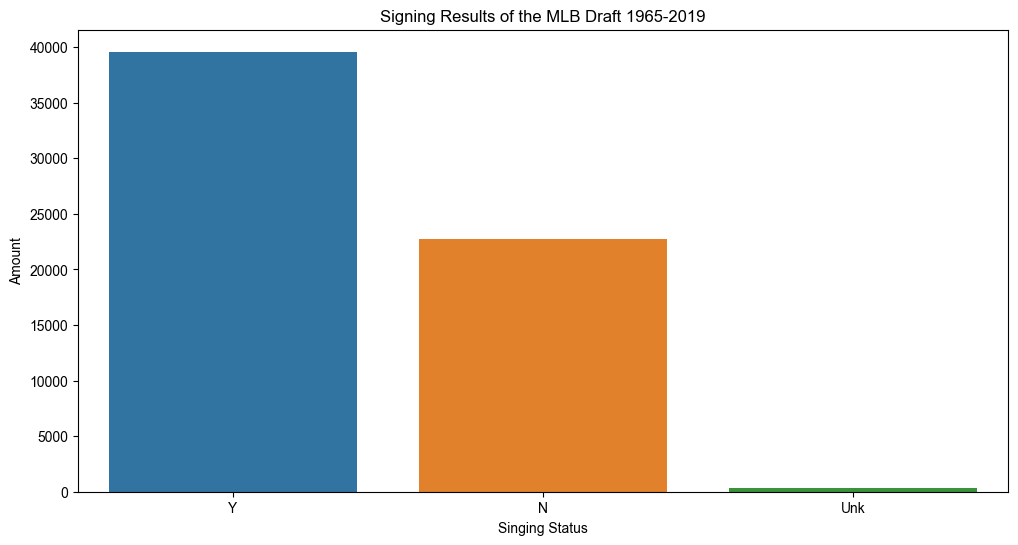

In [37]:
plt.figure(figsize = (12, 6))
sns.countplot(draft, x = 'Signed')
plt.title('Signing Results of the MLB Draft 1965-2019')
plt.xlabel('Singing Status')
sns.set_style('darkgrid')
plt.ylabel('Amount')


It makes sense that the majority of players who are drafted by an MLB team would choose to sign, the teams wouldn't pick them if they though there was no chance of signing these players. Let's take a deeper look at how these signing distributions are based on different categories.

In [38]:
cols_to_sort_by_2 = ['Pos', 'Tm','Type', 'DraftRound']

def plot_signing_results(): 
    for col in cols_to_sort_by_2:
        signing_percentage = draft.groupby(col)['Signed'].value_counts(normalize = True).reset_index()
        signing_percentage = signing_percentage[signing_percentage['Signed'] == 'Y']
        signing_percentage = signing_percentage.sort_values(by = 'proportion', ascending = False)
        
        plt.figure(figsize = (12,8))
        sns.set_style('darkgrid')
        sns.despine(top = True, right = True)
        sns.barplot(x = col, y = 'proportion', data = signing_percentage)
        plt.xticks(rotation = 90)
        plt.title('Signing Results by {}'.format(col))
        plt.ylabel('Proportion of Players Signed')
        sns.set_palette('bright')
        plt.show()
        


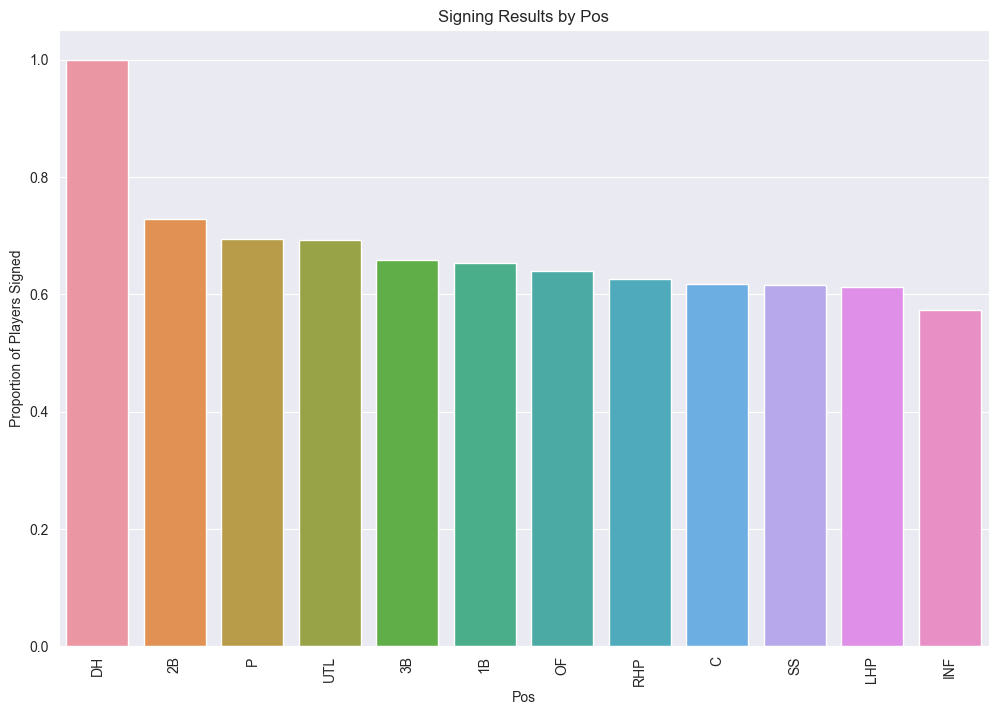

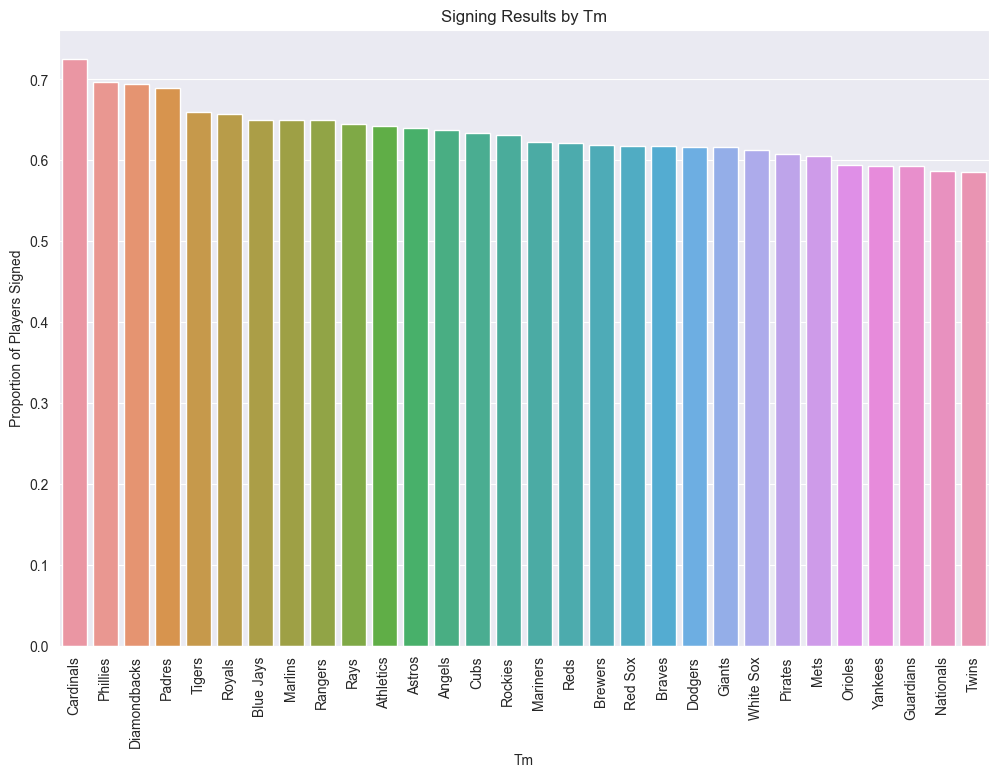

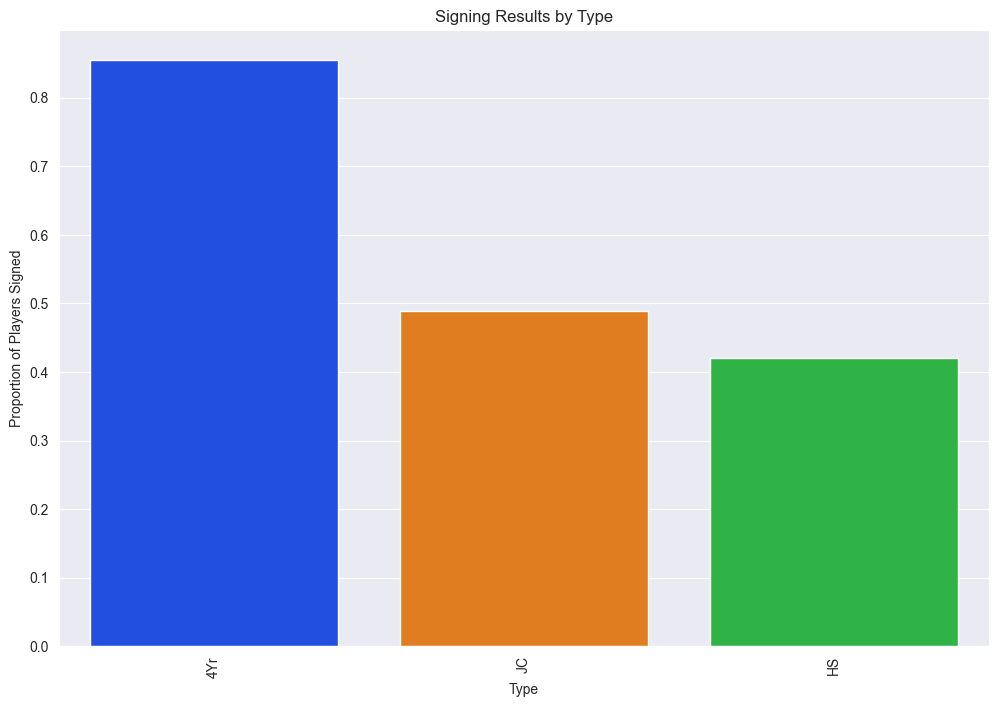

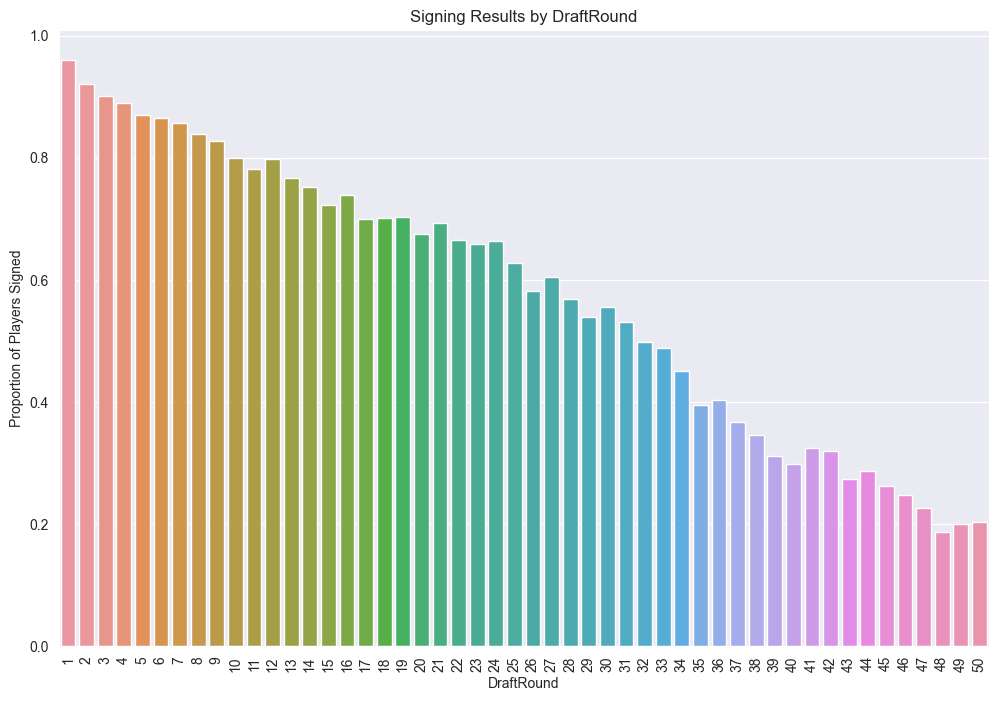

In [39]:
plot_signing_results()

Notable Insights:

Positional Signing Patterns: A comprehensive analysis of signing outcomes based on player positions reveals a relatively consistent trend across positions. While a closer look at the Designated Hitter (DH) position could be warranted, it's important to note that most drafted players are categorized under different positions. As a result, DH classifications may predominantly serve as outliers rather than indicative of distinct patterns.

University Programs and Signing Rates: An insightful revelation emerges when comparing the signing rates of players from different educational backgrounds. Players from 4-Year University Programs exhibit notably higher signing rates compared to those from High School and Junior College backgrounds. This observation aligns with the practicality that players in 4-Year University Programs face a crucial decision point: sign with an organization or return for a maximum of one additional year of college.

Draft Round and Signing Correlation: An intriguing correlation surfaces when examining the relationship between draft position and signing percentage. Notably, higher draft picks, which carry the allure of substantial bonuses, exhibit a heightened willingness to sign with an organization. The negative correlation between signing percentage and Draft Round underscores the profound impact of draft order on players' decisions to commit to professional baseball.

# Signing Bonus (Overall Distributions)

Here we will take a look at the overall signing bonus categorized by the different columns of our dataframe

Because the bonus information is not available for the players who did not sign, we first need to isolate the players for which we do have bonus information.

In [40]:
bonus_available = draft[~draft['Bonus'].isna()] #Find instances in the dataframe where the bonus is available
bonus_available.head()

,DraftYear,DraftRound,OvPck,Tm,Signed,Bonus,Name,Pos,Type,state/region
0,1965,1,1,Athletics,Y,100000.0,Rick Monday,OF,4Yr,AZ
1,1965,1,2,Mets,Y,50000.0,Les Rohr,LHP,HS,MT
2,1965,1,3,Twins,Y,65000.0,Joe Coleman,RHP,HS,MA
3,1965,1,4,Astros,Y,40000.0,Alex Barrett,SS,HS,CA
4,1965,1,5,Red Sox,Y,62500.0,Billy Conigliaro,OF,HS,MA


In [41]:
cols_to_sort_by = ['Pos', 'Tm', 'state/region', 'Type']

def plot_bonus_distributions():
    for col in cols_to_sort_by: #Group the mean bonus by the various columns
        bonus_sorted = bonus_available.groupby(col)['Bonus'].mean().reset_index()
        bonus_sorted.sort_values(by = 'Bonus', ascending = False, inplace = True)

        plt.figure(figsize = (12, 8)) # Plot these distributions in a barchart
        sns.barplot(data = bonus_sorted, y = 'Bonus', x  = col)
        plt.xticks(rotation = 90)
        plt.title('Mean Bonus by {}'.format(col))
        plt.show()


    

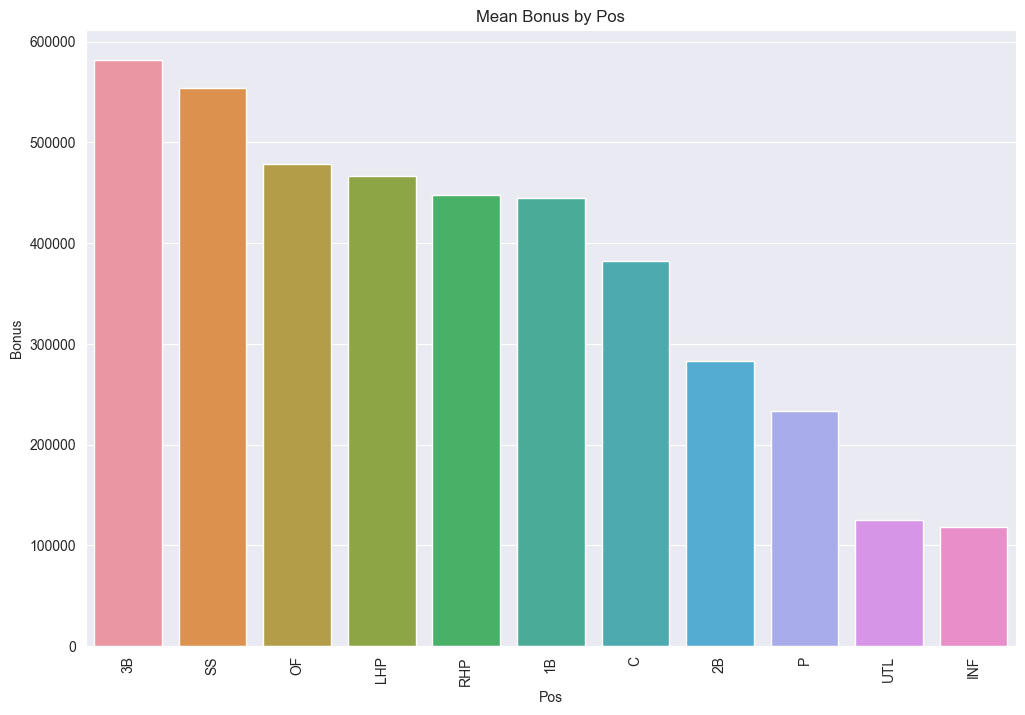

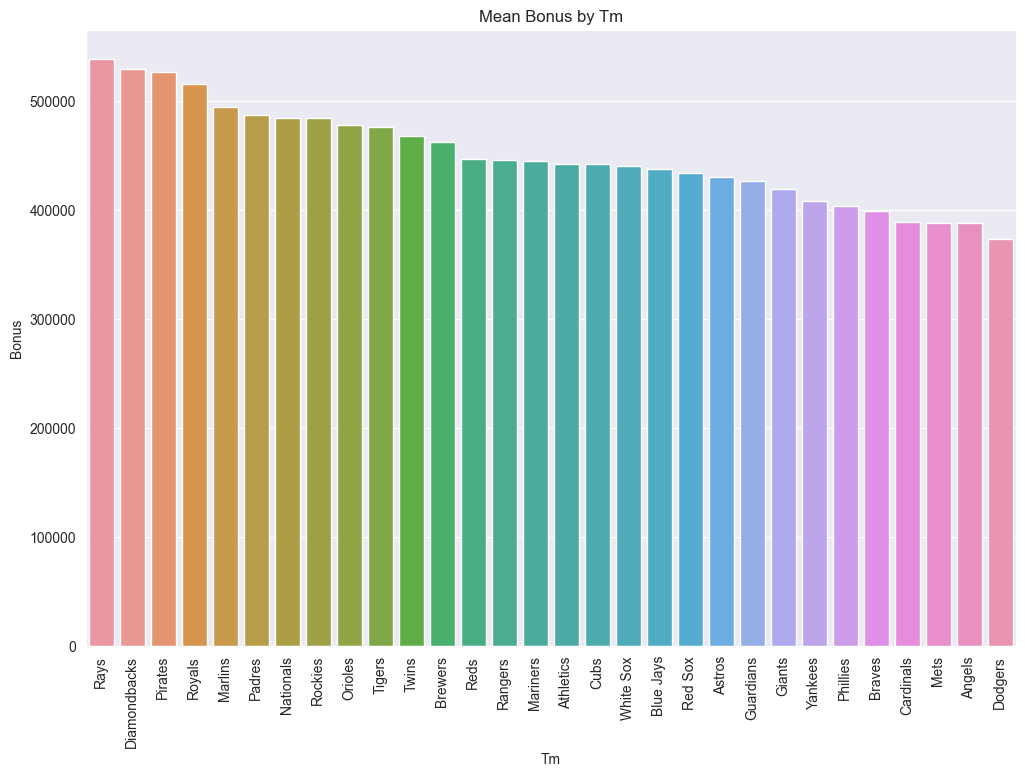

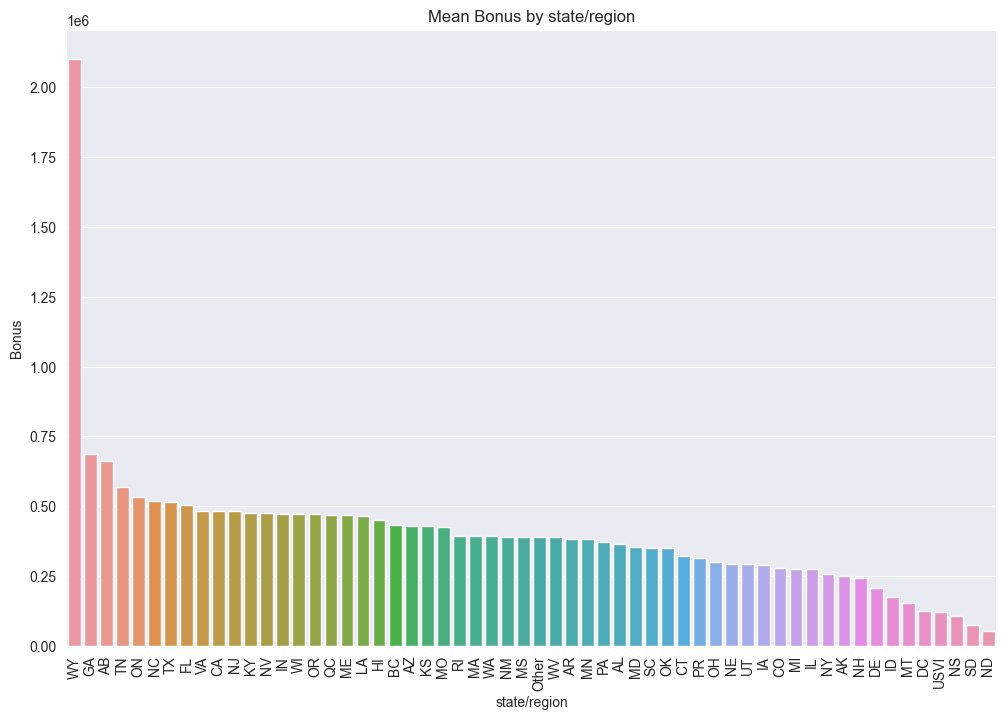

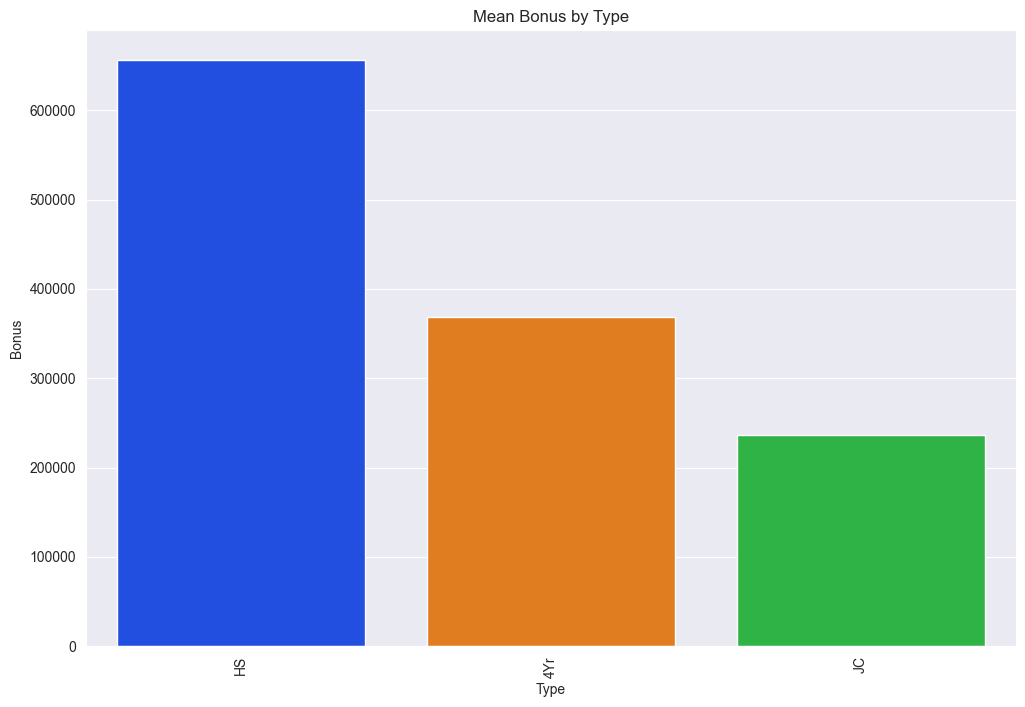

In [42]:
plot_bonus_distributions()

Notable Insights:

Positional Value and Signing Bonuses: Notably, when excluding third base due to a smaller sample size, a distinct pattern emerges highlighting the significance of premium positions. For instance, the robust signing bonuses attributed to shortstops underscore their high regard in the draft process, reflecting the critical role they play on the field.

Franchise Timing and Bonus Averages: A compelling trend surfaces as we examine more recent teams like the Rays and Diamondbacks. These teams boast higher signing bonus averages, aligning with the prevailing trajectory of increasing mean signing bonuses over time. This connection is intuitive, given that newer franchises operate within the timeframe when signing bonuses are at their peak.

Regional Influence and Bonuses: Geographical analysis reveals a distinct advantage for southern states, characterized by higher signing bonuses. This phenomenon can be attributed to their prolific production of top-tier high school players, contributing to a competitive talent pool and subsequently warranting higher incentives.

Incentives for High Schoolers: A captivating insight unfolds when considering signing bonuses for high school players. Evidently, high schoolers receive higher signing bonuses, a reflection of the added incentive required to entice these talents to bypass college and embark directly on the path to the major leagues. This practice aligns with the strategic decision-making process players face when contemplating their professional journey.

In [43]:
bonus_wyoming = bonus_available[bonus_available['state/region'] == 'WY']
bonus_wyoming

,DraftYear,DraftRound,OvPck,Tm,Signed,Bonus,Name,Pos,Type,state/region
51980,2011,1,13,Mets,Y,2100000.0,Brandon Nimmo,OF,HS,WY


Also we can note that the prominence of Wyoming in our mean bonus of average salary bar according to state graph, is due to them only having one player, Brandon Nimmo, who signed for a bonus of $2,100,000.

/var/folders/j3/nj43lyy510b4xnfvtq7th4480000gn/T/ipykernel_69624/3067868959.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




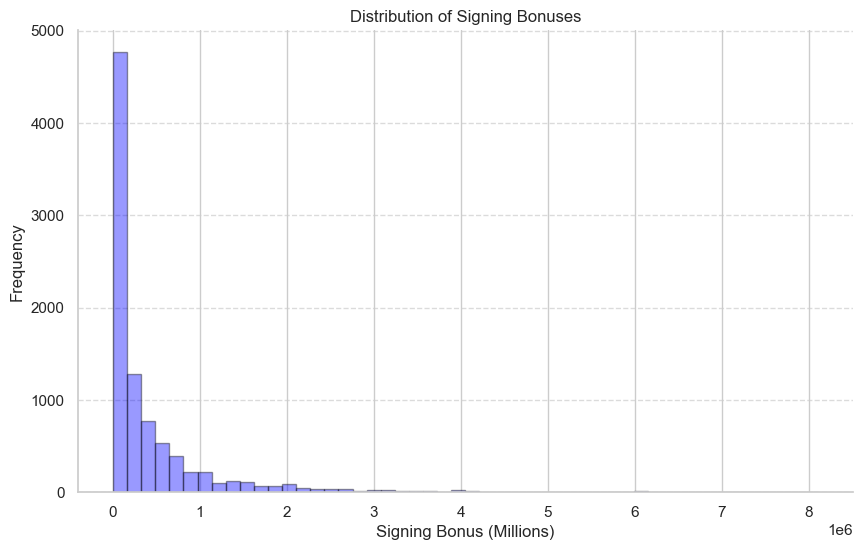

In [44]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.distplot(bonus_available['Bonus'], kde=False, color='blue', hist_kws={'edgecolor':'black'})

plt.xlabel('Signing Bonus (Millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Signing Bonuses')

sns.despine() 
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

Notable Insights:

Skewed Distribution: The histogram appears to be right-skewed, indicating that the majority of players receive relatively lower signing bonuses, while a smaller proportion of players receive higher bonuses. This skewness might suggest that a select group of top prospects command significantly larger bonuses compared to the rest of the draft pool.

Concentration of Bonuses: The histogram's peak likely corresponds to the concentration of players receiving signing bonuses within a certain range. This peak reflects the common bonuses awarded to a significant portion of drafted players.

Outliers and Exceptional Cases: There might be some outliers on the higher end of the bonus spectrum, contributing to the right tail of the distribution. These outliers could represent elite prospects or players with unique circumstances who negotiate larger signing bonuses.

Gradual Decline in Frequency: As the signing bonuses increase, the frequency of players receiving those higher bonuses decreases. This observation is consistent with the general trend of professional sports drafts, where fewer players receive substantial financial incentives compared to the majority.

# Signing Bonus (Time Based Distributions)

Because our data does not include all rounds for the every year of the draft, we will take a closer look at the first round of the draft to draw insight on how these trends have changed over time.

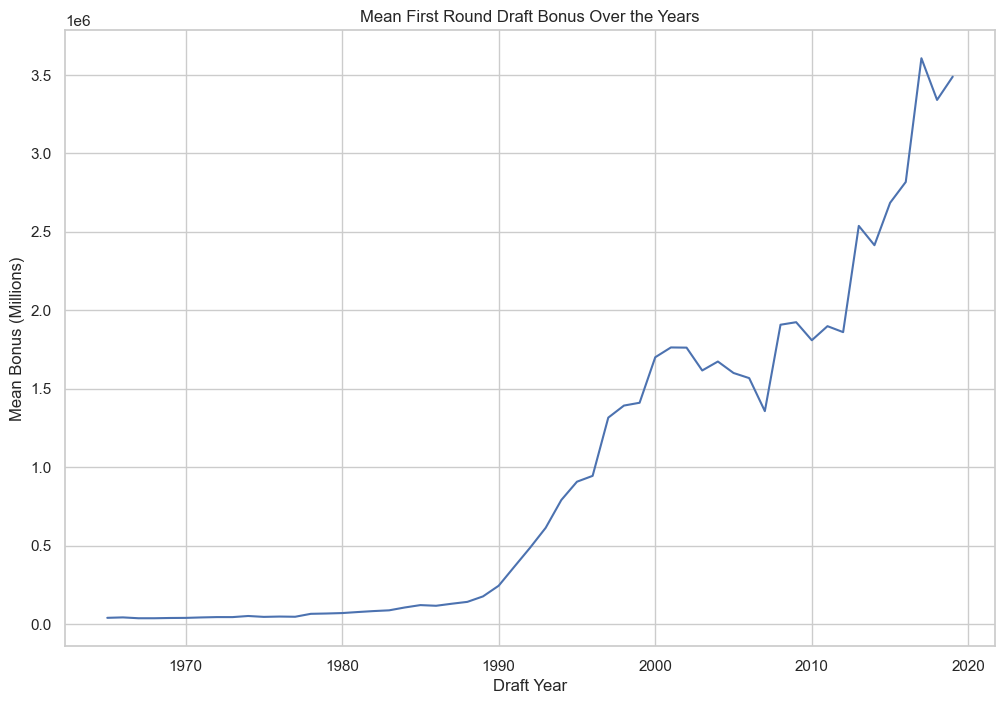

In [45]:
# Isolate the dataframe to only the first round and find the mean for each of these years
bonus_first_round = bonus_available[bonus_available['DraftRound'] == 1]
bonus_by_year_first = bonus_first_round.groupby('DraftYear')['Bonus'].mean().reset_index()
bonus_by_year_first.head()

# Create a line plot to explore relationship between first round and Draft Year
plt.figure(figsize = (12,8))
sns.lineplot(data = bonus_by_year_first, x = 'DraftYear', y = 'Bonus')
plt.title('Mean First Round Draft Bonus Over the Years')
plt.ylabel('Mean Bonus (Millions)')
plt.xlabel('Draft Year')
plt.show()

It is logical to observe an upward trend in the mean bonus of the first round of the draft over time. However, a more profound exploration beckons – one that discerns whether this surge is solely attributed to inflation or if it resonates with external influences, such as the broader expansion and evolution of the sports industry as a whole.

We will take a look at the inflation rate every year since 1965 and use it to estimate what the mean first round bonus would be like only factoring inflation, to what it actually is now.

In [46]:
# Load dataframe of the consumer price index
CPI = pd.read_csv('PRICES_CPI.csv')
CPI = CPI[(CPI['Time'] >= 1965) & (CPI['Time'] <= 2019)] #Get correct dates
CPI_US  = CPI[CPI['Country'] == 'United States'] #Get correct country
CPI_US = CPI_US[['Country','Value','Time']]
CPI_US['Percent Change'] = 1 + (CPI_US['Value'] / 100) # Calculate the rate of change used to compute the estimated mean bonus for the first round of the draft

CPI_US.head()
merged_bonus_by_year.head()

NameError: name 'merged_bonus_by_year' is not defined

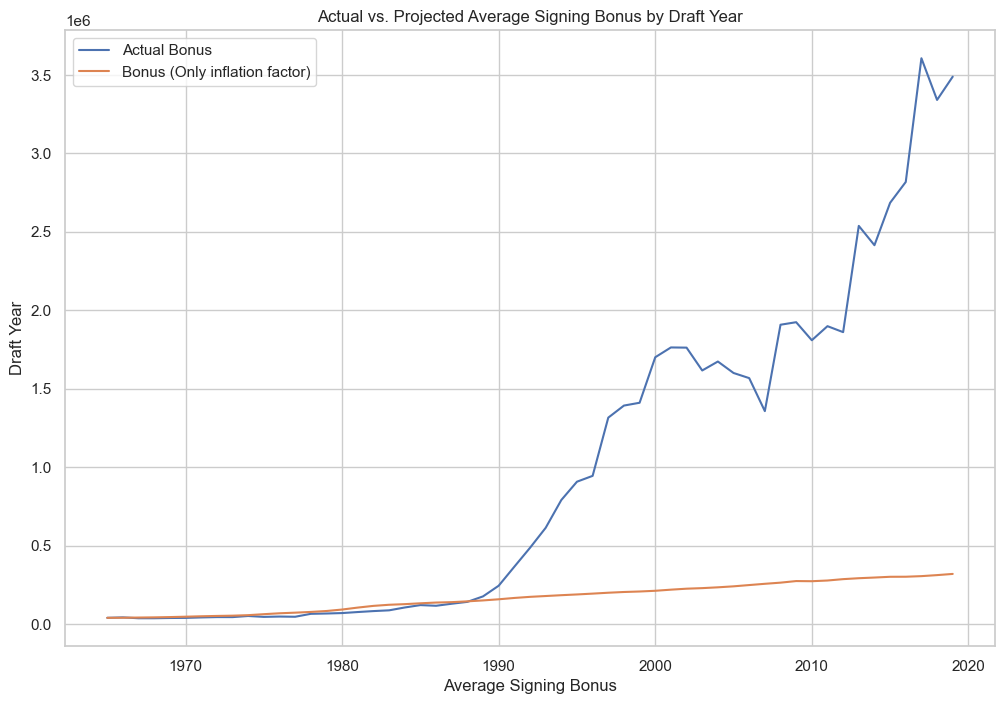

In [ ]:
merged_bonus_by_year = pd.merge(bonus_by_year_first, CPI_US[['Time', 'Percent Change']], how = 'inner', left_on = 'DraftYear', right_on = 'Time')
merged_bonus_by_year # Merge the dataframes together in order to create a new column that calculates the inflated bonus

projected_mean_bonus_by_inflation = [] #Initalize for loop
current_bonus = merged_bonus_by_year.loc[0, 'Bonus']
projected_mean_bonus_by_inflation.append(current_bonus) 

projected_mean_bonus_by_inflation

for i in range(len(merged_bonus_by_year) - 1): # Calculate the projected bonus based on the inflation rate since 1965 and append it to a list
    percent_change = merged_bonus_by_year.loc[i, 'Percent Change']
    current_bonus *= percent_change
    projected_mean_bonus_by_inflation.append(current_bonus)

merged_bonus_by_year['Projected Bonus'] = projected_mean_bonus_by_inflation #Add list as column to dataframe
merged_bonus_by_year.head()

plt.figure(figsize=(12, 8)) #Plot projected bonus compared to regular bonus

sns.set(style="whitegrid")
sns.lineplot(data=merged_bonus_by_year, y='Bonus', x='DraftYear', label='Actual Bonus')
sns.lineplot(data=merged_bonus_by_year, y='Projected Bonus', x='DraftYear', label='Bonus (Only inflation factor)')

plt.xlabel('Average Signing Bonus')
plt.ylabel('Draft Year')
plt.title('Actual vs. Projected Average Signing Bonus by Draft Year')
plt.legend()
plt.show()

This graph provides a visual insight into the upward trend of signing bonuses in baseball and sports as a whole. It goes beyond simple inflation, revealing a deeper narrative of the sports industry's expansion and the rising value placed on players. The data suggests a fascinating shift in the landscape, indicating that not only has the cost of money increased, but also that the game's popularity and the willingness to invest in players have grown significantly, showcasing the intricate interplay between sportsmanship and financial dynamics.

In [ ]:
signing_behavior_time = draft.groupby('DraftYear')['Signed'].value_counts(normalize = True).reset_index()
signing_behavior_time = signing_behavior_time[signing_behavior_time['Signed'] == 'Y']
signing_behavior_time.head()


,DraftYear,Signed,proportion
0,1965,Y,0.525896
3,1966,Y,0.507692
6,1967,Y,0.522248
9,1968,Y,0.554286
12,1969,Y,0.545265


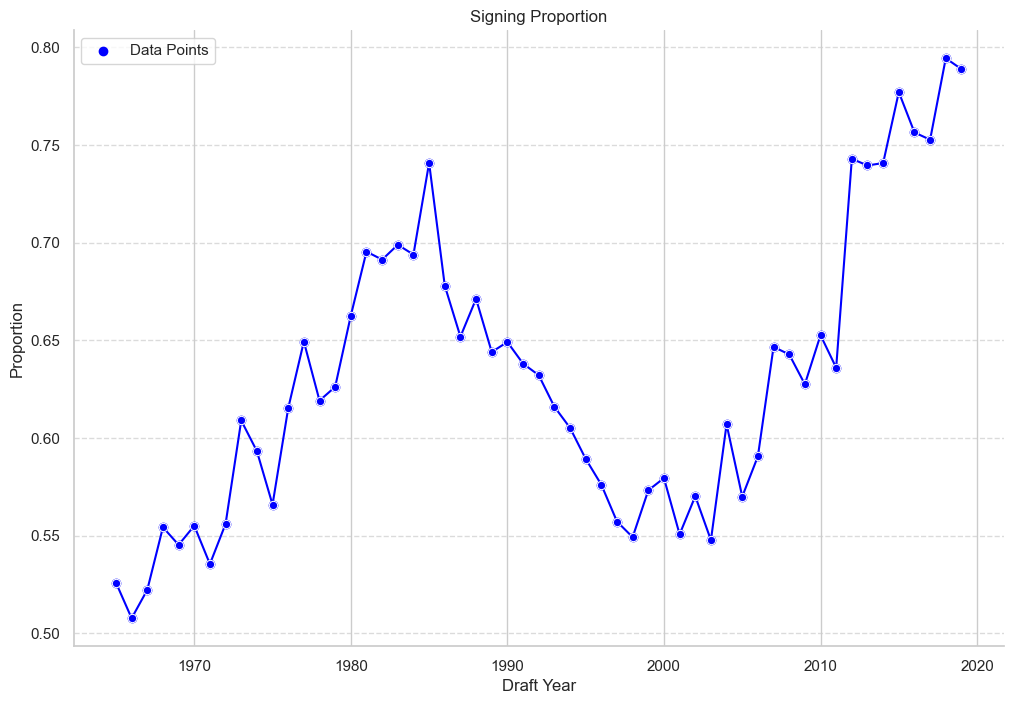

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.lineplot(data=signing_behavior_time, x='DraftYear', y='proportion', color='blue', marker='o')

plt.xlabel('Draft Year')
plt.ylabel('Proportion')
plt.title('Signing Proportion')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.scatter(signing_behavior_time['DraftYear'], signing_behavior_time['proportion'], color='blue', marker='o', label='Data Points')

plt.legend()

plt.show()


Notable Inisghts:

Rapid Increase in Signing Proportion (1965-1985): The signing proportion experienced a pronounced surge from 1965 to 1985, signifying a significant shift in player decisions to sign with MLB teams during this period. This rise could stem from multifaceted influences, such as unique draft circumstances, external factors like the Vietnam War potentially limiting player availability, or alterations in player-agent relationships. To gain deeper understanding, we'll further investigate potential disparities in draft picks among these years.

Prominent Surge in Signing Proportion (2010-2019): Another compelling observation emerges from the years 2010 to 2019, marked by a remarkable increase in signing proportion. This interval allows us to glean insights from more recent data. While several factors may contribute, it's noteworthy that the reduction of draft rounds from 50 to 40 in 2011 likely played a pivotal role. With fewer players drafted in each class, teams are more inclined to secure signings, as resources are concentrated on a select group, reinforcing the correlation between signing and draft round adjustments.




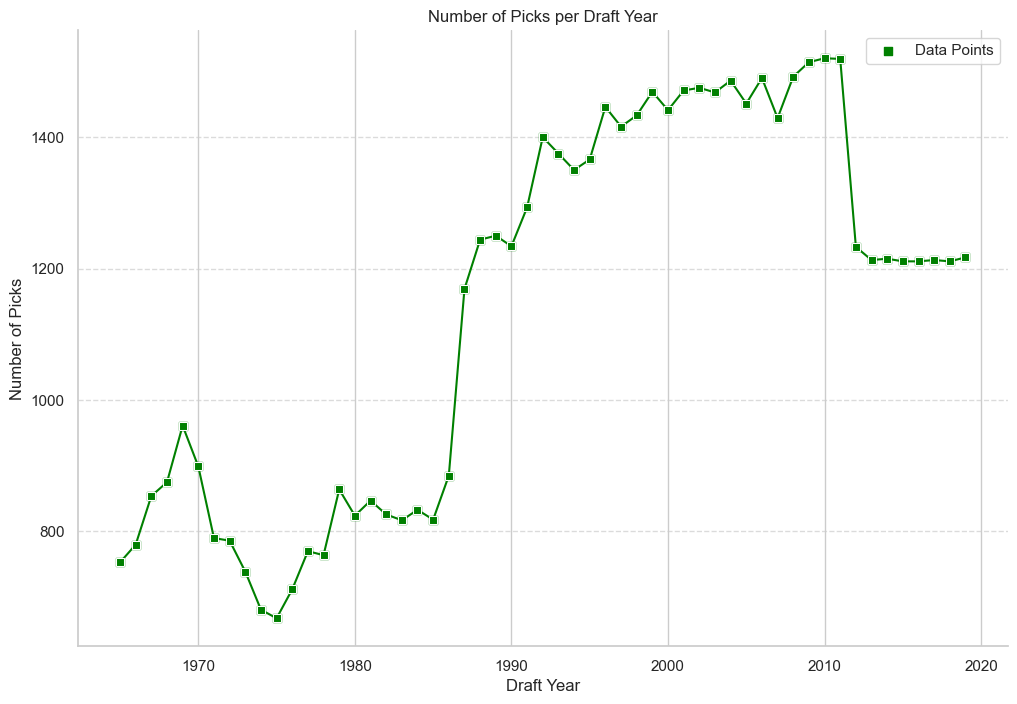

In [ ]:
picks_per_draft = draft.groupby('DraftYear')['OvPck'].count().reset_index()
picks_per_draft.head()

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.lineplot(data=picks_per_draft, x='DraftYear', y='OvPck', color='green', marker='s')

plt.xlabel('Draft Year')
plt.ylabel('Number of Picks')
plt.title('Number of Picks per Draft Year')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.scatter(picks_per_draft['DraftYear'], picks_per_draft['OvPck'], color='green', marker='s', label='Data Points')

plt.legend()

plt.show()

This visualization underscores a notable pattern in draft pick counts, particularly during the 1960s, 70s, and early 1980s, which influenced the dip in signing proportion during the 1980s. As more players were drafted, the incentive to sign diminished in later rounds.

The significant rise in signing percentage between 1965 and 1985, however, remains multifaceted. Factors like increased financial incentives, evolving player development strategies, and subtle cultural shifts likely contributed to this surge.

In 2011, a pivotal shift occurred with a reduction in draft rounds. This change amplified monetary incentives, potentially explaining the subsequent rise in signing percentages. Together, these insights provide a nuanced narrative of how historical context, financial dynamics, and draft structure have collectively shaped the landscape of MLB Draft signings over time.

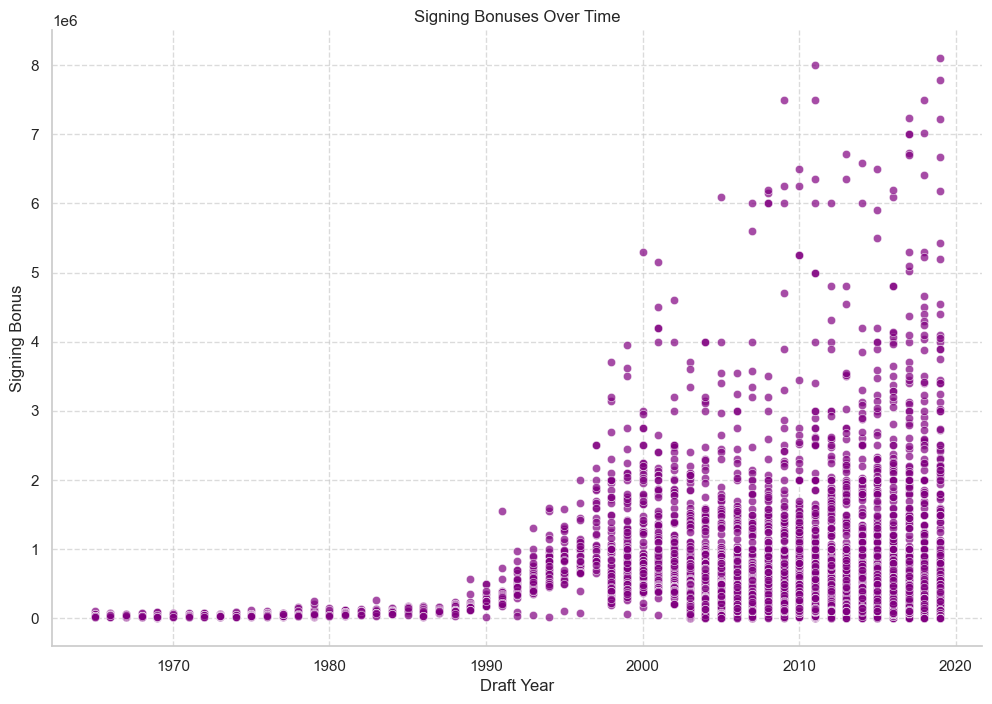

In [ ]:

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.scatterplot(data=bonus_available, x='DraftYear', y='Bonus', color='purple', marker='o', alpha=0.7)

plt.xlabel('Draft Year')
plt.ylabel('Signing Bonus')
plt.title('Signing Bonuses Over Time')

sns.despine()
plt.grid(axis='both', linestyle='--', alpha=0.7)  # Add dashed grid lines

plt.show()

As we closely examine this data, a remarkable trend unfolds—signing bonuses have undergone a profound transformation throughout the evolutionary trajectory of Major League Baseball. This compelling shift can be attributed to a confluence of multifaceted factors that have left an indelible imprint on the sport's financial landscape. Evolving player valuation methodologies, the escalating competitiveness of the market, amplified commercial revenues, and the ever-expanding global reach of the game collectively contribute to this extraordinary surge in signing bonuses. This dynamic interplay illuminates the intricate dance between economic dynamics and the intrinsic value ascribed to burgeoning talent within the realm of professional baseball.